In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression

In [80]:
df = pd.read_csv("../datasets/train_1st_clean.csv")
df.shape

(2051, 82)

In [81]:
kaggle_data = pd.read_csv('../datasets/test.csv')
kaggle_data.shape

(878, 80)

In [82]:
df = df.drop(columns='Unnamed: 0')
df.head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [83]:
kaggle_data.columns = [col.replace(" ", "_").lower() for col in kaggle_data.columns]
kaggle_data.head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,6,8,1910,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,TA,Fa,Stone,Fa,TA,No,Unf,0,Unf,0,1020,1020,GasA,Gd,N,FuseP,908,1020,0,1928,0,0,2,0,4,2,Fa,9,Typ,0,NaN,Detchd,1910.0,Unf,1,440,Po,Po,Y,0,60,112,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,5,4,1977,1977,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,Unf,0,Unf,0,1967,1967,GasA,TA,Y,SBrkr,1967,0,0,1967,0,0,2,0,6,2,TA,10,Typ,0,NaN,Attchd,1977.0,Fin,2,580,TA,TA,Y,170,0,0,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,Gd,Av,GLQ,554,Unf,0,100,654,GasA,Ex,Y,SBrkr,664,832,0,1496,1,0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,2006.0,RFn,2,426,TA,TA,Y,100,24,0,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,6,1923,2006,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Gd,TA,CBlock,TA,TA,No,Unf,0,Unf,0,968,968,GasA,TA,Y,SBrkr,968,0,0,968,0,0,1,0,2,1,TA,5,Typ,0,NaN,Detchd,1935.0,Unf,2,480,Fa,TA,N,0,0,184,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1963,1963,Gable,CompShg,Plywood,Plywood,BrkFace,247.0,TA,TA,CBlock,Gd,TA,No,BLQ,609,Unf,0,785,1394,GasA,Gd,Y,SBrkr,1394,0,0,1394,1,0,1,1,3,1,TA,6,Typ,2,Gd,Attchd,1963.0,RFn,2,514,TA,TA,Y,0,76,0,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [84]:
from sklearn.preprocessing import PolynomialFeatures

In [85]:
new_features = ['year_built', 'total_bsmt_sf', 'garage_cars', 'garage_area', 'gr_liv_area', 'overall_qual']

In [86]:
X = df[new_features]
y = df['saleprice']

In [87]:
poly = PolynomialFeatures(include_bias=False)
poly.fit(X)

PolynomialFeatures(include_bias=False)

In [88]:
X_poly = poly.transform(X)
X_poly

array([[1.976000e+03, 7.250000e+02, 2.000000e+00, ..., 2.187441e+06,
        8.874000e+03, 3.600000e+01],
       [1.996000e+03, 9.130000e+02, 2.000000e+00, ..., 4.502884e+06,
        1.485400e+04, 4.900000e+01],
       [1.953000e+03, 1.057000e+03, 1.000000e+00, ..., 1.117249e+06,
        5.285000e+03, 2.500000e+01],
       ...,
       [1.928000e+03, 8.960000e+02, 2.000000e+00, ..., 3.659569e+06,
        1.147800e+04, 3.600000e+01],
       [1.956000e+03, 1.200000e+03, 1.000000e+00, ..., 1.440000e+06,
        4.800000e+03, 1.600000e+01],
       [1.999000e+03, 9.940000e+02, 2.000000e+00, ..., 3.254416e+06,
        1.262800e+04, 4.900000e+01]])

In [89]:
poly.get_feature_names(new_features)

['year_built',
 'total_bsmt_sf',
 'garage_cars',
 'garage_area',
 'gr_liv_area',
 'overall_qual',
 'year_built^2',
 'year_built total_bsmt_sf',
 'year_built garage_cars',
 'year_built garage_area',
 'year_built gr_liv_area',
 'year_built overall_qual',
 'total_bsmt_sf^2',
 'total_bsmt_sf garage_cars',
 'total_bsmt_sf garage_area',
 'total_bsmt_sf gr_liv_area',
 'total_bsmt_sf overall_qual',
 'garage_cars^2',
 'garage_cars garage_area',
 'garage_cars gr_liv_area',
 'garage_cars overall_qual',
 'garage_area^2',
 'garage_area gr_liv_area',
 'garage_area overall_qual',
 'gr_liv_area^2',
 'gr_liv_area overall_qual',
 'overall_qual^2']

In [90]:
df_shortened_poly = pd.DataFrame(X_poly, columns=poly.get_feature_names(new_features))

### Need to add the id column and put first so can merge with dummy df later

In [91]:
df_shortened_poly['id'] = df['id']
cols = df_shortened_poly.columns.tolist()
cols = cols[-1:] + cols[:-1]
df_shortened_poly = df_shortened_poly[cols].copy() #  .copy() gets rid of the data error problem when making the saleprice column
df_shortened_poly.head()

,id,year_built,total_bsmt_sf,garage_cars,garage_area,gr_liv_area,overall_qual,year_built^2,year_built total_bsmt_sf,year_built garage_cars,year_built garage_area,year_built gr_liv_area,year_built overall_qual,total_bsmt_sf^2,total_bsmt_sf garage_cars,total_bsmt_sf garage_area,total_bsmt_sf gr_liv_area,total_bsmt_sf overall_qual,garage_cars^2,garage_cars garage_area,garage_cars gr_liv_area,garage_cars overall_qual,garage_area^2,garage_area gr_liv_area,garage_area overall_qual,gr_liv_area^2,gr_liv_area overall_qual,overall_qual^2
0,109,1976.0,725.0,2.0,475.0,1479.0,6.0,3904576.0,1432600.0,3952.0,938600.0,2922504.0,11856.0,525625.0,1450.0,344375.0,1072275.0,4350.0,4.0,950.0,2958.0,12.0,225625.0,702525.0,2850.0,2187441.0,8874.0,36.0
1,544,1996.0,913.0,2.0,559.0,2122.0,7.0,3984016.0,1822348.0,3992.0,1115764.0,4235512.0,13972.0,833569.0,1826.0,510367.0,1937386.0,6391.0,4.0,1118.0,4244.0,14.0,312481.0,1186198.0,3913.0,4502884.0,14854.0,49.0
2,153,1953.0,1057.0,1.0,246.0,1057.0,5.0,3814209.0,2064321.0,1953.0,480438.0,2064321.0,9765.0,1117249.0,1057.0,260022.0,1117249.0,5285.0,1.0,246.0,1057.0,5.0,60516.0,260022.0,1230.0,1117249.0,5285.0,25.0
3,318,2006.0,384.0,2.0,400.0,1444.0,5.0,4024036.0,770304.0,4012.0,802400.0,2896664.0,10030.0,147456.0,768.0,153600.0,554496.0,1920.0,4.0,800.0,2888.0,10.0,160000.0,577600.0,2000.0,2085136.0,7220.0,25.0
4,255,1900.0,676.0,2.0,484.0,1445.0,6.0,3610000.0,1284400.0,3800.0,919600.0,2745500.0,11400.0,456976.0,1352.0,327184.0,976820.0,4056.0,4.0,968.0,2890.0,12.0,234256.0,699380.0,2904.0,2088025.0,8670.0,36.0


# Poly finished, need to get dummy columns now

In [92]:
df_dummies = pd.get_dummies(df, columns=['house_style', 'lot_shape', 'ms_zoning'])

In [93]:
new_df = pd.merge(df_dummies, df_shortened_poly, on='id')

In [94]:
new_df.shape

(2051, 124)

In [95]:
new_df.columns.value_counts().sum() # no duplicate columns only unique

124

In [96]:
pd.set_option('display.max_columns', 124)

In [97]:
new_df.head()

,id,pid,ms_subclass,lot_frontage,lot_area,street,alley,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,overall_qual_x,overall_cond,year_built_x,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf_x,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area_x,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars_x,garage_area_x,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice,house_style_1.5Fin,house_style_1.5Unf,house_style_1Story,house_style_2.5Fin,house_style_2.5Unf,house_style_2Story,house_style_SFoyer,house_style_SLvl,lot_shape_IR1,lot_shape_IR2,lot_shape_IR3,lot_shape_Reg,ms_zoning_A (agr),ms_zoning_C (all),ms_zoning_FV,ms_zoning_I (all),ms_zoning_RH,ms_zoning_RL,ms_zoning_RM,year_built_y,total_bsmt_sf_y,garage_cars_y,garage_area_y,gr_liv_area_y,overall_qual_y,year_built^2,year_built total_bsmt_sf,year_built garage_cars,year_built garage_area,year_built gr_liv_area,year_built overall_qual,total_bsmt_sf^2,total_bsmt_sf garage_cars,total_bsmt_sf garage_area,total_bsmt_sf gr_liv_area,total_bsmt_sf overall_qual,garage_cars^2,garage_cars garage_area,garage_cars gr_liv_area,garage_cars overall_qual,garage_area^2,garage_area gr_liv_area,garage_area overall_qual,gr_liv_area^2,gr_liv_area overall_qual,overall_qual^2
0,109,533352170,60,NaN,13517,Pave,NaN,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1976.0,725.0,2.0,475.0,1479.0,6.0,3904576.0,1432600.0,3952.0,938600.0,2922504.0,11856.0,525625.0,1450.0,344375.0,1072275.0,4350.0,4.0,950.0,2958.0,12.0,225625.0,702525.0,2850.0,2187441.0,8874.0,36.0
1,544,531379050,60,43.0,11492,Pave,NaN,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1996.0,913.0,2.0,559.0,2122.0,7.0,3984016.0,1822348.0,3992.0,1115764.0,4235512.0,13972.0,833569.0,1826.0,510367.0,1937386.0,6391.0,4.0,1118.0,4244.0,14.0,312481.0,1186198.0,3913.0,4502884.0,14854.0,49.0
2,153,535304180,20,68.0,7922,Pave,NaN,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1953.0,1057.0,1.0,246.0,1057.0,5.0,3814209.0,2064321.0,1953.0,480438.0,2064321.0,9765.0,1117249.0,1057.0,260022.0,1117249.0,5285.0,1.0,246.0,1057.0,5.0,60516.0,260022.0,1230.0,1117249.0,5285.0,25.0
3,318,916386060,60,73.0,9802,Pave,NaN,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,174000,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,2006.0,384.0,2.0,400.0,1444.0,5.0,4024036.0,770304.0,4012.0,802400.0,2896664.0,10030.0,147456.0,768.0,153600.0,554496.0,1920.0,4.0,800.0,2888.0,10.0,16000

# Initial Lin Reg on New_DF

In [98]:
lr = LinearRegression()

In [99]:
combined_features = ['year_built_y', # copy and pasted so format looks weird, taking out "['overall_qual^2house_style_1.5Fin'] not in index" error
 'total_bsmt_sf_y',
 'garage_cars_y',
 'garage_area_y',
 'gr_liv_area_y',
 'overall_qual_y',
 'year_built^2',
 'year_built total_bsmt_sf',
 'year_built garage_cars',
 'year_built garage_area',
 'year_built gr_liv_area',
 'year_built overall_qual',
 'total_bsmt_sf^2',
 'total_bsmt_sf garage_cars',
 'total_bsmt_sf garage_area',
 'total_bsmt_sf gr_liv_area',
 'total_bsmt_sf overall_qual',
 'garage_cars^2',
 'garage_cars garage_area',
 'garage_cars gr_liv_area',
 'garage_cars overall_qual',
 'garage_area^2',
 'garage_area gr_liv_area',
 'garage_area overall_qual',
 'gr_liv_area^2',
 'gr_liv_area overall_qual',
 #'overall_qual^2''house_style_1.5Fin', 
                     'house_style_1.5Unf', 'house_style_1Story', 'house_style_2.5Fin', 
                     'house_style_2.5Unf', 'house_style_2Story', 'house_style_SFoyer', 
                     'house_style_SLvl', 'lot_shape_IR1', 'lot_shape_IR2', 'lot_shape_IR3', 
                     'lot_shape_Reg', 'ms_zoning_C (all)', 'ms_zoning_FV', 'ms_zoning_I (all)', 
                     'ms_zoning_RH', 'ms_zoning_RL', 'ms_zoning_RM']

In [100]:
new_df[combined_features]

,year_built_y,total_bsmt_sf_y,garage_cars_y,garage_area_y,gr_liv_area_y,overall_qual_y,year_built^2,year_built total_bsmt_sf,year_built garage_cars,year_built garage_area,year_built gr_liv_area,year_built overall_qual,total_bsmt_sf^2,total_bsmt_sf garage_cars,total_bsmt_sf garage_area,total_bsmt_sf gr_liv_area,total_bsmt_sf overall_qual,garage_cars^2,garage_cars garage_area,garage_cars gr_liv_area,garage_cars overall_qual,garage_area^2,garage_area gr_liv_area,garage_area overall_qual,gr_liv_area^2,gr_liv_area overall_qual,house_style_1.5Unf,house_style_1Story,house_style_2.5Fin,house_style_2.5Unf,house_style_2Story,house_style_SFoyer,house_style_SLvl,lot_shape_IR1,lot_shape_IR2,lot_shape_IR3,lot_shape_Reg,ms_zoning_C (all),ms_zoning_FV,ms_zoning_I (all),ms_zoning_RH,ms_zoning_RL,ms_zoning_RM
0,1976.0,725.0,2.0,475.0,1479.0,6.0,3904576.0,1432600.0,3952.0,938600.0,2922504.0,11856.0,525625.0,1450.0,344375.0,1072275.0,4350.0,4.0,950.0,2958.0,12.0,225625.0,702525.0,2850.0,2187441.0,8874.0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0
1,1996.0,913.0,2.0,559.0,2122.0,7.0,3984016.0,1822348.0,3992.0,1115764.0,4235512.0,13972.0,833569.0,1826.0,510367.0,1937386.0,6391.0,4.0,1118.0,4244.0,14.0,312481.0,1186198.0,3913.0,4502884.0,14854.0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0
2,1953.0,1057.0,1.0,246.0,1057.0,5.0,3814209.0,2064321.0,1953.0,480438.0,2064321.0,9765.0,1117249.0,1057.0,260022.0,1117249.0,5285.0,1.0,246.0,1057.0,5.0,60516.0,260022.0,1230.0,1117249.0,5285.0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,2006.0,384.0,2.0,400.0,1444.0,5.0,4024036.0,770304.0,4012.0,802400.0,2896664.0,10030.0,147456.0,768.0,153600.0,554496.0,1920.0,4.0,800.0,2888.0,10.0,160000.0,577600.0,2000.0,2085136.0,7220.0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0
4,1900.0,676.0,2.0,484.0,1445.0,6.0,3610000.0,1284400.0,3800.0,919600.0,2745500.0,11400.0,456976.0,1352.0,327184.0,976820.0,4056.0,4.0,968.0,2890.0,12.0,234256.0,699380.0,2904.0,2088025.0,8670.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,2007.0,1884.0,2.0,520.0,1728.0,8.0,4028049.0,3781188.0,4014.0,1043640.0,3468096.0,16056.0,3549456.0,3768.0,979680.0,3255552.0,15072.0,4.0,1040.0,3456.0,16.0,270400.0,898560.0,4160.0,2985984.0,13824.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
2047,1940.0,861.0,2.0,539.0,861.0,4.0,3763600.0,1670340.0,3880.0,1045660.0,1670340.0,7760.0,741321.0,1722.0,464079.0,741321.0,3444.0,4.0,1078.0,1722.0,8.0,290521.0,464079.0,2156.0,741321.0,3444.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
2048,1928.0,896.0,2.0,342.0,1913.0,6.0,3717184.0,1727488.0,3856.0,659376.0,3688264.0,11568.0,802816.0,1792.0,306432.0,1714048.0,5376.0,4.0,684.0,3826.0,12.0,116964.0,654246.0,2052.0,3659569.0,11478.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2049,1956.0,1200.0,1.0,294.0,1200.0,4.0,3825936.0,2347200.0,1956.0,575064.0,2347200.0,7824.0,1440000.0,1200.0,352800.0,1440000.0,4800.0,1.0,294.0,1200.0,4.0,86436.0,352800.0,1176.0,1440000.0,4800.0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [101]:
new_X = new_df[combined_features]
new_X

,year_built_y,total_bsmt_sf_y,garage_cars_y,garage_area_y,gr_liv_area_y,overall_qual_y,year_built^2,year_built total_bsmt_sf,year_built garage_cars,year_built garage_area,year_built gr_liv_area,year_built overall_qual,total_bsmt_sf^2,total_bsmt_sf garage_cars,total_bsmt_sf garage_area,total_bsmt_sf gr_liv_area,total_bsmt_sf overall_qual,garage_cars^2,garage_cars garage_area,garage_cars gr_liv_area,garage_cars overall_qual,garage_area^2,garage_area gr_liv_area,garage_area overall_qual,gr_liv_area^2,gr_liv_area overall_qual,house_style_1.5Unf,house_style_1Story,house_style_2.5Fin,house_style_2.5Unf,house_style_2Story,house_style_SFoyer,house_style_SLvl,lot_shape_IR1,lot_shape_IR2,lot_shape_IR3,lot_shape_Reg,ms_zoning_C (all),ms_zoning_FV,ms_zoning_I (all),ms_zoning_RH,ms_zoning_RL,ms_zoning_RM
0,1976.0,725.0,2.0,475.0,1479.0,6.0,3904576.0,1432600.0,3952.0,938600.0,2922504.0,11856.0,525625.0,1450.0,344375.0,1072275.0,4350.0,4.0,950.0,2958.0,12.0,225625.0,702525.0,2850.0,2187441.0,8874.0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0
1,1996.0,913.0,2.0,559.0,2122.0,7.0,3984016.0,1822348.0,3992.0,1115764.0,4235512.0,13972.0,833569.0,1826.0,510367.0,1937386.0,6391.0,4.0,1118.0,4244.0,14.0,312481.0,1186198.0,3913.0,4502884.0,14854.0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0
2,1953.0,1057.0,1.0,246.0,1057.0,5.0,3814209.0,2064321.0,1953.0,480438.0,2064321.0,9765.0,1117249.0,1057.0,260022.0,1117249.0,5285.0,1.0,246.0,1057.0,5.0,60516.0,260022.0,1230.0,1117249.0,5285.0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,2006.0,384.0,2.0,400.0,1444.0,5.0,4024036.0,770304.0,4012.0,802400.0,2896664.0,10030.0,147456.0,768.0,153600.0,554496.0,1920.0,4.0,800.0,2888.0,10.0,160000.0,577600.0,2000.0,2085136.0,7220.0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0
4,1900.0,676.0,2.0,484.0,1445.0,6.0,3610000.0,1284400.0,3800.0,919600.0,2745500.0,11400.0,456976.0,1352.0,327184.0,976820.0,4056.0,4.0,968.0,2890.0,12.0,234256.0,699380.0,2904.0,2088025.0,8670.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,2007.0,1884.0,2.0,520.0,1728.0,8.0,4028049.0,3781188.0,4014.0,1043640.0,3468096.0,16056.0,3549456.0,3768.0,979680.0,3255552.0,15072.0,4.0,1040.0,3456.0,16.0,270400.0,898560.0,4160.0,2985984.0,13824.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
2047,1940.0,861.0,2.0,539.0,861.0,4.0,3763600.0,1670340.0,3880.0,1045660.0,1670340.0,7760.0,741321.0,1722.0,464079.0,741321.0,3444.0,4.0,1078.0,1722.0,8.0,290521.0,464079.0,2156.0,741321.0,3444.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
2048,1928.0,896.0,2.0,342.0,1913.0,6.0,3717184.0,1727488.0,3856.0,659376.0,3688264.0,11568.0,802816.0,1792.0,306432.0,1714048.0,5376.0,4.0,684.0,3826.0,12.0,116964.0,654246.0,2052.0,3659569.0,11478.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2049,1956.0,1200.0,1.0,294.0,1200.0,4.0,3825936.0,2347200.0,1956.0,575064.0,2347200.0,7824.0,1440000.0,1200.0,352800.0,1440000.0,4800.0,1.0,294.0,1200.0,4.0,86436.0,352800.0,1176.0,1440000.0,4800.0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [102]:
cross_val_score(lr, new_X, y).mean()

0.8570847886494102

In [103]:
X_train, X_test, y_train, y_test = train_test_split(new_X, y, random_state = 42)

In [104]:
lr.fit(X_train, y_train)

LinearRegression()

In [105]:
lr.score(X_train, y_train), lr.score(X_test, y_test)

(0.8728197394503288, 0.8701135390164657)

In [206]:
lr.score(new_X, y)

0.8721679219146058

# Need to do exact same process to test set

In [106]:
kaggle_X = kaggle_data[new_features]
#kaggle_X

In [107]:
poly1 = PolynomialFeatures(include_bias=False)
poly1.fit(kaggle_X)

PolynomialFeatures(include_bias=False)

In [108]:
Kaggle_X_poly = poly.transform(kaggle_X)
Kaggle_X_poly

array([[1.910000e+03, 1.020000e+03, 1.000000e+00, ..., 3.717184e+06,
        1.156800e+04, 3.600000e+01],
       [1.977000e+03, 1.967000e+03, 2.000000e+00, ..., 3.869089e+06,
        9.835000e+03, 2.500000e+01],
       [2.006000e+03, 6.540000e+02, 2.000000e+00, ..., 2.238016e+06,
        1.047200e+04, 4.900000e+01],
       ...,
       [1.968000e+03, 9.520000e+02, 1.000000e+00, ..., 1.466521e+06,
        6.055000e+03, 2.500000e+01],
       [1.971000e+03, 8.640000e+02, 2.000000e+00, ..., 7.464960e+05,
        3.456000e+03, 1.600000e+01],
       [1.955000e+03, 9.230000e+02, 1.000000e+00, ..., 8.556250e+05,
        4.625000e+03, 2.500000e+01]])

In [109]:
 kaggle_poly_cols = poly1.get_feature_names(new_features)

In [110]:
kaggle_shortened_poly = pd.DataFrame(Kaggle_X_poly, columns=poly1.get_feature_names(new_features))

In [111]:
kaggle_shortened_poly.head(1)

,year_built,total_bsmt_sf,garage_cars,garage_area,gr_liv_area,overall_qual,year_built^2,year_built total_bsmt_sf,year_built garage_cars,year_built garage_area,year_built gr_liv_area,year_built overall_qual,total_bsmt_sf^2,total_bsmt_sf garage_cars,total_bsmt_sf garage_area,total_bsmt_sf gr_liv_area,total_bsmt_sf overall_qual,garage_cars^2,garage_cars garage_area,garage_cars gr_liv_area,garage_cars overall_qual,garage_area^2,garage_area gr_liv_area,garage_area overall_qual,gr_liv_area^2,gr_liv_area overall_qual,overall_qual^2
0,1910.0,1020.0,1.0,440.0,1928.0,6.0,3648100.0,1948200.0,1910.0,840400.0,3682480.0,11460.0,1040400.0,1020.0,448800.0,1966560.0,6120.0,1.0,440.0,1928.0,6.0,193600.0,848320.0,2640.0,3717184.0,11568.0,36.0


In [112]:
kaggle_shortened_poly['id'] = kaggle_data['id']
cols = kaggle_shortened_poly.columns.tolist()
cols = cols[-1:] + cols[:-1]
kaggle_shortened_poly = kaggle_shortened_poly[cols].copy() #  .copy() gets rid of the data error problem when making the saleprice column
kaggle_shortened_poly.head()

,id,year_built,total_bsmt_sf,garage_cars,garage_area,gr_liv_area,overall_qual,year_built^2,year_built total_bsmt_sf,year_built garage_cars,year_built garage_area,year_built gr_liv_area,year_built overall_qual,total_bsmt_sf^2,total_bsmt_sf garage_cars,total_bsmt_sf garage_area,total_bsmt_sf gr_liv_area,total_bsmt_sf overall_qual,garage_cars^2,garage_cars garage_area,garage_cars gr_liv_area,garage_cars overall_qual,garage_area^2,garage_area gr_liv_area,garage_area overall_qual,gr_liv_area^2,gr_liv_area overall_qual,overall_qual^2
0,2658,1910.0,1020.0,1.0,440.0,1928.0,6.0,3648100.0,1948200.0,1910.0,840400.0,3682480.0,11460.0,1040400.0,1020.0,448800.0,1966560.0,6120.0,1.0,440.0,1928.0,6.0,193600.0,848320.0,2640.0,3717184.0,11568.0,36.0
1,2718,1977.0,1967.0,2.0,580.0,1967.0,5.0,3908529.0,3888759.0,3954.0,1146660.0,3888759.0,9885.0,3869089.0,3934.0,1140860.0,3869089.0,9835.0,4.0,1160.0,3934.0,10.0,336400.0,1140860.0,2900.0,3869089.0,9835.0,25.0
2,2414,2006.0,654.0,2.0,426.0,1496.0,7.0,4024036.0,1311924.0,4012.0,854556.0,3000976.0,14042.0,427716.0,1308.0,278604.0,978384.0,4578.0,4.0,852.0,2992.0,14.0,181476.0,637296.0,2982.0,2238016.0,10472.0,49.0
3,1989,1923.0,968.0,2.0,480.0,968.0,5.0,3697929.0,1861464.0,3846.0,923040.0,1861464.0,9615.0,937024.0,1936.0,464640.0,937024.0,4840.0,4.0,960.0,1936.0,10.0,230400.0,464640.0,2400.0,937024.0,4840.0,25.0
4,625,1963.0,1394.0,2.0,514.0,1394.0,6.0,3853369.0,2736422.0,3926.0,1008982.0,2736422.0,11778.0,1943236.0,2788.0,716516.0,1943236.0,8364.0,4.0,1028.0,2788.0,12.0,264196.0,716516.0,3084.0,1943236.0,8364.0,36.0


## Kaggle Poly finished, need to do Kaggle Dummies now

In [113]:
kaggle_dummies = pd.get_dummies(kaggle_data, columns=['house_style', 'lot_shape', 'ms_zoning'])

In [114]:
new_kaggle_data = pd.merge(kaggle_dummies, kaggle_shortened_poly, on='id')

In [115]:
new_kaggle_data.shape

(878, 122)

In [116]:
new_kaggle_data.columns.value_counts().sum() # no duplicate columns only unique

122

In [117]:
new_kaggle_data.head()

,id,pid,ms_subclass,lot_frontage,lot_area,street,alley,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,overall_qual_x,overall_cond,year_built_x,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf_x,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area_x,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars_x,garage_area_x,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,house_style_1.5Fin,house_style_1.5Unf,house_style_1Story,house_style_2.5Fin,house_style_2.5Unf,house_style_2Story,house_style_SFoyer,house_style_SLvl,lot_shape_IR1,lot_shape_IR2,lot_shape_IR3,lot_shape_Reg,ms_zoning_C (all),ms_zoning_FV,ms_zoning_I (all),ms_zoning_RH,ms_zoning_RL,ms_zoning_RM,year_built_y,total_bsmt_sf_y,garage_cars_y,garage_area_y,gr_liv_area_y,overall_qual_y,year_built^2,year_built total_bsmt_sf,year_built garage_cars,year_built garage_area,year_built gr_liv_area,year_built overall_qual,total_bsmt_sf^2,total_bsmt_sf garage_cars,total_bsmt_sf garage_area,total_bsmt_sf gr_liv_area,total_bsmt_sf overall_qual,garage_cars^2,garage_cars garage_area,garage_cars gr_liv_area,garage_cars overall_qual,garage_area^2,garage_area gr_liv_area,garage_area overall_qual,gr_liv_area^2,gr_liv_area overall_qual,overall_qual^2
0,2658,902301120,190,69.0,9142,Pave,Grvl,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,6,8,1910,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,TA,Fa,Stone,Fa,TA,No,Unf,0,Unf,0,1020,1020,GasA,Gd,N,FuseP,908,1020,0,1928,0,0,2,0,4,2,Fa,9,Typ,0,NaN,Detchd,1910.0,Unf,1,440,Po,Po,Y,0,60,112,0,0,0,NaN,NaN,NaN,0,4,2006,WD,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1910.0,1020.0,1.0,440.0,1928.0,6.0,3648100.0,1948200.0,1910.0,840400.0,3682480.0,11460.0,1040400.0,1020.0,448800.0,1966560.0,6120.0,1.0,440.0,1928.0,6.0,193600.0,848320.0,2640.0,3717184.0,11568.0,36.0
1,2718,905108090,90,NaN,9662,Pave,NaN,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,5,4,1977,1977,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,Unf,0,Unf,0,1967,1967,GasA,TA,Y,SBrkr,1967,0,0,1967,0,0,2,0,6,2,TA,10,Typ,0,NaN,Attchd,1977.0,Fin,2,580,TA,TA,Y,170,0,0,0,0,0,NaN,NaN,NaN,0,8,2006,WD,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1977.0,1967.0,2.0,580.0,1967.0,5.0,3908529.0,3888759.0,3954.0,1146660.0,3888759.0,9885.0,3869089.0,3934.0,1140860.0,3869089.0,9835.0,4.0,1160.0,3934.0,10.0,336400.0,1140860.0,2900.0,3869089.0,9835.0,25.0
2,2414,528218130,60,58.0,17104,Pave,NaN,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,Gd,Av,GLQ,554,Unf,0,100,654,GasA,Ex,Y,SBrkr,664,832,0,1496,1,0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,2006.0,RFn,2,426,TA,TA,Y,100,24,0,0,0,0,NaN,NaN,NaN,0,9,2006,New,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,2006.0,654.0,2.0,426.0,1496.0,7.0,4024036.0,1311924.0,4012.0,854556.0,3000976.0,14042.0,427716.0,1308.0,278604.0,978384.0,4578.0,4.0,852.0,2992.0,14.0,181476.0,637296.0,2982.0,2238016.0,10472.0,49.0
3,1989,902207150,30,60.0,8520,Pave,NaN,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,5,6,1923,2006,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Gd,TA,CBlock,TA,TA,No,Unf,0,Unf,0,968,968,GasA,TA,Y,SBrkr,968,0,0,968,0,0,1,0,2,1,TA,5,Typ,0,NaN,Detchd,1935.0,Unf,2,480,Fa,TA,N,0,0,184,0,0,0,NaN,NaN,NaN,0,7,2007,WD,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1923.0,968.0,2.0,480.0,968.0,5.0,3697929.0,1861464.0,3846.0,923040.0,1861464.0,9615.0,937024.0,1936.0,464640.0,937024.0,4840.0,4.0,960.0,1936.0,10.0,230400.0,464640.0,2400.0,937024.0,4840.0,25.0
4,625,535105100,20,NaN,9500,Pave,NaN,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,6

# Making predictions from train set onto test set

In [118]:
pd.set_option('display.max_columns', 125)

In [119]:
kaggle_predictions = lr.predict(new_kaggle_data[combined_features])

In [120]:
new_kaggle_data['saleprice'] = kaggle_predictions

In [121]:
new_kaggle_data[['id', 'saleprice']]

,id,saleprice
0,2658,146879.723861
1,2718,169603.083087
2,2414,173867.766572
3,1989,112514.949861
4,625,180968.669625
...,...,...
873,1662,193121.138901
874,1234,196426.123062
875,1373,133390.570081
876,1672,109574.217296


In [122]:
final_kaggle_df = new_kaggle_data[['id', 'saleprice']]
final_kaggle_df

,id,saleprice
0,2658,146879.723861
1,2718,169603.083087
2,2414,173867.766572
3,1989,112514.949861
4,625,180968.669625
...,...,...
873,1662,193121.138901
874,1234,196426.123062
875,1373,133390.570081
876,1672,109574.217296


# Kaggle Output non scaled exported

In [123]:
#final_kaggle_df.to_csv('../datasets/Kaggle_mlr1_poly_and_locations.csv', index=False)

# Need to scale original and kaggle before merge to perform LASSO

In [124]:
df_shortened_poly # Train data original pre merge

,id,year_built,total_bsmt_sf,garage_cars,garage_area,gr_liv_area,overall_qual,year_built^2,year_built total_bsmt_sf,year_built garage_cars,year_built garage_area,year_built gr_liv_area,year_built overall_qual,total_bsmt_sf^2,total_bsmt_sf garage_cars,total_bsmt_sf garage_area,total_bsmt_sf gr_liv_area,total_bsmt_sf overall_qual,garage_cars^2,garage_cars garage_area,garage_cars gr_liv_area,garage_cars overall_qual,garage_area^2,garage_area gr_liv_area,garage_area overall_qual,gr_liv_area^2,gr_liv_area overall_qual,overall_qual^2
0,109,1976.0,725.0,2.0,475.0,1479.0,6.0,3904576.0,1432600.0,3952.0,938600.0,2922504.0,11856.0,525625.0,1450.0,344375.0,1072275.0,4350.0,4.0,950.0,2958.0,12.0,225625.0,702525.0,2850.0,2187441.0,8874.0,36.0
1,544,1996.0,913.0,2.0,559.0,2122.0,7.0,3984016.0,1822348.0,3992.0,1115764.0,4235512.0,13972.0,833569.0,1826.0,510367.0,1937386.0,6391.0,4.0,1118.0,4244.0,14.0,312481.0,1186198.0,3913.0,4502884.0,14854.0,49.0
2,153,1953.0,1057.0,1.0,246.0,1057.0,5.0,3814209.0,2064321.0,1953.0,480438.0,2064321.0,9765.0,1117249.0,1057.0,260022.0,1117249.0,5285.0,1.0,246.0,1057.0,5.0,60516.0,260022.0,1230.0,1117249.0,5285.0,25.0
3,318,2006.0,384.0,2.0,400.0,1444.0,5.0,4024036.0,770304.0,4012.0,802400.0,2896664.0,10030.0,147456.0,768.0,153600.0,554496.0,1920.0,4.0,800.0,2888.0,10.0,160000.0,577600.0,2000.0,2085136.0,7220.0,25.0
4,255,1900.0,676.0,2.0,484.0,1445.0,6.0,3610000.0,1284400.0,3800.0,919600.0,2745500.0,11400.0,456976.0,1352.0,327184.0,976820.0,4056.0,4.0,968.0,2890.0,12.0,234256.0,699380.0,2904.0,2088025.0,8670.0,36.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,1587,2007.0,1884.0,2.0,520.0,1728.0,8.0,4028049.0,3781188.0,4014.0,1043640.0,3468096.0,16056.0,3549456.0,3768.0,979680.0,3255552.0,15072.0,4.0,1040.0,3456.0,16.0,270400.0,898560.0,4160.0,2985984.0,13824.0,64.0
2047,785,1940.0,861.0,2.0,539.0,861.0,4.0,3763600.0,1670340.0,3880.0,1045660.0,1670340.0,7760.0,741321.0,1722.0,464079.0,741321.0,3444.0,4.0,1078.0,1722.0,8.0,290521.0,464079.0,2156.0,741321.0,3444.0,16.0
2048,916,1928.0,896.0,2.0,342.0,1913.0,6.0,3717184.0,1727488.0,3856.0,659376.0,3688264.0,11568.0,802816.0,1792.0,306432.0,1714048.0,5376.0,4.0,684.0,3826.0,12.0,116964.0,654246.0,2052.0,3659569.0,11478.0,36.0
2049,639,1956.0,1200.0,1.0,294.0,1200.0,4.0,3825936.0,2347200.0,1956.0,575064.0,2347200.0,7824.0,1440000.0,1200.0,352800.0,1440000.0,4800.0,1.0,294.0,1200.0,4.0,86436.0,352800.0,1176.0,1440000.0,4800.0,16.0


In [125]:
from sklearn.preprocessing import StandardScaler

In [126]:
# Scale our data, train was only used on first set
ss = StandardScaler()
df_shortened_poly_scaled = ss.fit_transform(df_shortened_poly)

In [127]:
print(f'shape is: {df_shortened_poly_scaled.shape}')
print(f'shape is: {y.shape}')

shape is: (2051, 28)
shape is: (2051,)


In [128]:
df_shortened_poly_scaled

array([[-1.61776959,  0.14222744, -0.74130474, ..., -0.1636271 ,
        -0.14031473, -0.18872503],
       [-1.10222935,  0.80512594, -0.32277503, ...,  1.05508932,
         1.06801486,  0.53467569],
       [-1.56562299, -0.62010583, -0.00219909, ..., -0.72691479,
        -0.86551455, -0.80083332],
       ...,
       [-0.66135356, -1.44872896, -0.3606208 , ...,  0.61121666,
         0.38585421, -0.18872503],
       [-0.9896401 , -0.52067106,  0.31615064, ..., -0.55703718,
        -0.96351452, -1.3016492 ],
       [-1.73509943,  0.90456072, -0.14245106, ...,  0.39796736,
         0.61822528,  0.53467569]])

In [129]:
df_shortened_poly_scaled = pd.DataFrame(data=df_shortened_poly_scaled, index=df_shortened_poly.index, columns=df_shortened_poly.columns)

# Need to delete scaled id and replace with fixed ID column

In [130]:
df_shortened_poly_scaled_1 = df_shortened_poly_scaled.drop(columns='id')

In [131]:
df_shortened_poly_scaled_1['id'] = df['id']
cols = df_shortened_poly_scaled_1.columns.tolist()
cols = cols[-1:] + cols[:-1]
df_shortened_poly_scaled_1 = df_shortened_poly_scaled_1[cols].copy() #  .copy() gets rid of the data error problem when making the saleprice column
df_shortened_poly_scaled_1.head()

,id,year_built,total_bsmt_sf,garage_cars,garage_area,gr_liv_area,overall_qual,year_built^2,year_built total_bsmt_sf,year_built garage_cars,year_built garage_area,year_built gr_liv_area,year_built overall_qual,total_bsmt_sf^2,total_bsmt_sf garage_cars,total_bsmt_sf garage_area,total_bsmt_sf gr_liv_area,total_bsmt_sf overall_qual,garage_cars^2,garage_cars garage_area,garage_cars gr_liv_area,garage_cars overall_qual,garage_area^2,garage_area gr_liv_area,garage_area overall_qual,gr_liv_area^2,gr_liv_area overall_qual,overall_qual^2
0,109,0.142227,-0.741305,0.292216,0.006154,-0.040634,-0.078644,0.135356,-0.729890,0.284743,0.003441,-0.037663,-0.075542,-0.564549,-0.389050,-0.440043,-0.439937,-0.588268,0.095050,-0.052614,0.057439,0.075265,-0.199310,-0.109370,-0.115797,-0.163627,-0.140315,-0.188725
1,544,0.805126,-0.322775,0.292216,0.395350,1.244529,0.622656,0.806155,-0.298218,0.310844,0.413544,1.275943,0.646763,-0.346004,-0.136087,-0.082234,0.177998,-0.101751,0.095050,0.174722,0.740821,0.375887,0.182649,0.762474,0.447192,1.055089,1.068015,0.534676
2,153,-0.620106,-0.002199,-1.016376,-1.054870,-0.884084,-0.779944,-0.627711,-0.030217,-1.019626,-1.057120,-0.896236,-0.789314,-0.144679,-0.653450,-0.621873,-0.407812,-0.365390,-1.004279,-1.005262,-0.952754,-0.976912,-0.925395,-0.907003,-0.973785,-0.726915,-0.865515,-0.800833
3,318,1.136575,-1.500446,0.292216,-0.341343,-0.110588,-0.779944,1.144087,-1.463428,0.323894,-0.311837,-0.063515,-0.698855,-0.832932,-0.847882,-0.851274,-0.809778,-1.167512,0.095050,-0.255593,0.020241,-0.225357,-0.487903,-0.334553,-0.565976,-0.217475,-0.474525,-0.800833
4,255,-2.376787,-0.850390,0.292216,0.047853,-0.108589,-0.078644,-2.352071,-0.894032,0.185561,-0.040540,-0.214747,-0.231200,-0.613268,-0.454982,-0.477100,-0.508118,-0.658349,0.095050,-0.028257,0.021304,0.075265,-0.161354,-0.115039,-0.087197,-0.215954,-0.181535,-0.188725


# Now can merge with categorical values and then do lin reg

In [132]:
new_df_scaled = pd.merge(df_dummies, df_shortened_poly_scaled_1, on='id')

In [133]:
new_df_scaled.head(1)

,id,pid,ms_subclass,lot_frontage,lot_area,street,alley,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,overall_qual_x,overall_cond,year_built_x,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf_x,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area_x,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars_x,garage_area_x,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice,house_style_1.5Fin,house_style_1.5Unf,house_style_1Story,house_style_2.5Fin,house_style_2.5Unf,house_style_2Story,house_style_SFoyer,house_style_SLvl,lot_shape_IR1,lot_shape_IR2,lot_shape_IR3,lot_shape_Reg,ms_zoning_A (agr),ms_zoning_C (all),ms_zoning_FV,ms_zoning_I (all),ms_zoning_RH,ms_zoning_RL,ms_zoning_RM,year_built_y,total_bsmt_sf_y,garage_cars_y,garage_area_y,gr_liv_area_y,overall_qual_y,year_built^2,year_built total_bsmt_sf,year_built garage_cars,year_built garage_area,year_built gr_liv_area,year_built overall_qual,total_bsmt_sf^2,total_bsmt_sf garage_cars,total_bsmt_sf garage_area,total_bsmt_sf gr_liv_area,total_bsmt_sf overall_qual,garage_cars^2,garage_cars garage_area,garage_cars gr_liv_area,garage_cars overall_qual,garage_area^2,garage_area gr_liv_area,garage_area overall_qual,gr_liv_area^2,gr_liv_area overall_qual,overall_qual^2
0,109,533352170,60,NaN,13517,Pave,NaN,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0.142227,-0.741305,0.292216,0.006154,-0.040634,-0.078644,0.135356,-0.72989,0.284743,0.003441,-0.037663,-0.075542,-0.564549,-0.38905,-0.440043,-0.439937,-0.588268,0.09505,-0.052614,0.057439,0.075265,-0.19931,-0.10937,-0.115797,-0.163627,-0.140315,-0.188725


# Lasso on Linear scaled model

In [134]:
from sklearn.linear_model import Lasso, LassoCV

In [135]:
new_X_scaled = new_df_scaled[combined_features]
new_X_scaled

,year_built_y,total_bsmt_sf_y,garage_cars_y,garage_area_y,gr_liv_area_y,overall_qual_y,year_built^2,year_built total_bsmt_sf,year_built garage_cars,year_built garage_area,year_built gr_liv_area,year_built overall_qual,total_bsmt_sf^2,total_bsmt_sf garage_cars,total_bsmt_sf garage_area,total_bsmt_sf gr_liv_area,total_bsmt_sf overall_qual,garage_cars^2,garage_cars garage_area,garage_cars gr_liv_area,garage_cars overall_qual,garage_area^2,garage_area gr_liv_area,garage_area overall_qual,gr_liv_area^2,gr_liv_area overall_qual,house_style_1.5Unf,house_style_1Story,house_style_2.5Fin,house_style_2.5Unf,house_style_2Story,house_style_SFoyer,house_style_SLvl,lot_shape_IR1,lot_shape_IR2,lot_shape_IR3,lot_shape_Reg,ms_zoning_C (all),ms_zoning_FV,ms_zoning_I (all),ms_zoning_RH,ms_zoning_RL,ms_zoning_RM
0,0.142227,-0.741305,0.292216,0.006154,-0.040634,-0.078644,0.135356,-0.729890,0.284743,0.003441,-0.037663,-0.075542,-0.564549,-0.389050,-0.440043,-0.439937,-0.588268,0.095050,-0.052614,0.057439,0.075265,-0.199310,-0.109370,-0.115797,-0.163627,-0.140315,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0
1,0.805126,-0.322775,0.292216,0.395350,1.244529,0.622656,0.806155,-0.298218,0.310844,0.413544,1.275943,0.646763,-0.346004,-0.136087,-0.082234,0.177998,-0.101751,0.095050,0.174722,0.740821,0.375887,0.182649,0.762474,0.447192,1.055089,1.068015,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0
2,-0.620106,-0.002199,-1.016376,-1.054870,-0.884084,-0.779944,-0.627711,-0.030217,-1.019626,-1.057120,-0.896236,-0.789314,-0.144679,-0.653450,-0.621873,-0.407812,-0.365390,-1.004279,-1.005262,-0.952754,-0.976912,-0.925395,-0.907003,-0.973785,-0.726915,-0.865515,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,1.136575,-1.500446,0.292216,-0.341343,-0.110588,-0.779944,1.144087,-1.463428,0.323894,-0.311837,-0.063515,-0.698855,-0.832932,-0.847882,-0.851274,-0.809778,-1.167512,0.095050,-0.255593,0.020241,-0.225357,-0.487903,-0.334553,-0.565976,-0.217475,-0.474525,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0
4,-2.376787,-0.850390,0.292216,0.047853,-0.108589,-0.078644,-2.352071,-0.894032,0.185561,-0.040540,-0.214747,-0.231200,-0.613268,-0.454982,-0.477100,-0.508118,-0.658349,0.095050,-0.028257,0.021304,0.075265,-0.161354,-0.115039,-0.087197,-0.215954,-0.181535,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,1.169720,1.838886,0.292216,0.214652,0.457042,1.323956,1.177973,1.871329,0.325199,0.246590,0.508177,1.358145,1.581435,1.170441,0.929408,1.119543,1.967555,0.095050,0.069173,0.322077,0.676509,-0.002407,0.243993,0.578008,0.256680,0.859891,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
2047,-1.050990,-0.438539,0.292216,0.302684,-1.275829,-1.481245,-1.055058,-0.466577,0.237762,0.251266,-1.290396,-1.473729,-0.411471,-0.206056,-0.182012,-0.676332,-0.804233,0.095050,0.120594,-0.599372,-0.525979,0.086077,-0.539180,-0.483355,-0.924782,-1.237510,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
2048,-1.448729,-0.360621,0.292216,-0.610074,0.826801,-0.078644,-1.446999,-0.403282,0.222102,-0.642912,0.728446,-0.173852,-0.367829,-0.158961,-0.521833,0.018472,-0.343698,0.095050,-0.412563,0.518695,0.075265,-0.677159,-0.196395,-0.538435,0.611217,0.385854,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2049,-0.520671,0.316151,-1.016376,-0.832472,-0.598270,-1.481245,-0.528687,0.283091,-1.017668,-0.838078,-0.613229,-1.451882,0.084374,-0.557244,-0.421883,-0.177276,-0.481001,-1.004279,-0.940309,-0.876763,-1.127222,-0.811409,-0.739766,-1.002384,-0.557037,-0.963515,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [136]:
ols = LinearRegression()
ols.fit(new_X_scaled, y)

LinearRegression()

In [137]:
cross_val_score(lr, new_X, y).mean(), cross_val_score(ols, new_X_scaled, y).mean() # makes sense same as non scaled, lasso not implemented yet

(0.8570847886494102, 0.8570847886698123)

In [138]:
np.abs(ols.coef_).sum() # What lasso does

3037060.7691557677

In [184]:
np.logspace(-3, 300, 1000)

array([1.00000000e-003, 2.01049642e-003, 4.04209584e-003, 8.12661920e-003,
       1.63385388e-002, 3.28485737e-002, 6.60419396e-002, 1.32777083e-001,
       2.66947849e-001, 5.36697695e-001, 1.07902879e+000, 2.16938352e+000,
       4.36153779e+000, 8.76885609e+000, 1.76297538e+001, 3.54445567e+001,
       7.12611543e+001, 1.43270295e+002, 2.88044415e+002, 5.79112265e+002,
       1.16430313e+003, 2.34082728e+003, 4.70622485e+003, 9.46184819e+003,
       1.90230119e+004, 3.82456972e+004, 7.68928372e+004, 1.54592774e+005,
       3.10808217e+005, 6.24878807e+005, 1.25631660e+006, 2.52582003e+006,
       5.07815211e+006, 1.02096066e+007, 2.05263775e+007, 4.12682085e+007,
       8.29695852e+007, 1.66810054e+008, 3.35371015e+008, 6.74262224e+008,
       1.35560179e+009, 2.72543253e+009, 5.47947234e+009, 1.10164595e+010,
       2.21485523e+010, 4.45295851e+010, 8.95265713e+010, 1.79992851e+011,
       3.61874981e+011, 7.27548353e+011, 1.46273336e+012, 2.94082017e+012,
       5.91250841e+012, 1

In [185]:
l_alphas = np.logspace(-3, 300, 1000)
lasso = LassoCV(alphas=l_alphas, cv=5)

In [186]:
lasso.fit(new_X_scaled, y)

C:\Users\Spencer\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3373219651.7819824, tolerance: 1026891063.9887584
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Spencer\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3976777889.488037, tolerance: 1026891063.9887584
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Spencer\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6673602043.246094, tolerance: 1026891063.9887584
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Spencer\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descen

C:\Users\Spencer\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4112958100.9658203, tolerance: 1024127411.0469208
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Spencer\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 24576475285.08972, tolerance: 1024127411.0469208
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Spencer\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 72354123183.31104, tolerance: 1024127411.0469208
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Spencer\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descen

C:\Users\Spencer\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 662110160693.8889, tolerance: 1053788072.0385877
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Spencer\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 662237979776.2969, tolerance: 1053788072.0385877
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Spencer\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 662245047812.2446, tolerance: 1053788072.0385877
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Spencer\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent

LassoCV(alphas=array([1.00000000e-003, 2.01049642e-003, 4.04209584e-003, 8.12661920e-003,
       1.63385388e-002, 3.28485737e-002, 6.60419396e-002, 1.32777083e-001,
       2.66947849e-001, 5.36697695e-001, 1.07902879e+000, 2.16938352e+000,
       4.36153779e+000, 8.76885609e+000, 1.76297538e+001, 3.54445567e+001,
       7.12611543e+001, 1.43270295e+002, 2.88044415e+002, 5.79112265e+002,
       1.164303...
       1.05687597e+293, 2.12484535e+293, 4.27199397e+293, 8.58882856e+293,
       1.72678090e+294, 3.47168682e+294, 6.97981391e+294, 1.40328908e+295,
       2.82130768e+295, 5.67222897e+295, 1.14039960e+296, 2.29276931e+296,
       4.60960449e+296, 9.26759330e+296, 1.86324631e+297, 3.74605003e+297,
       7.53142017e+297, 1.51418933e+298, 3.04427221e+298, 6.12049837e+298,
       1.23052400e+299, 2.47396410e+299, 4.97389596e+299, 1.00000000e+300]),
        cv=5)

In [187]:
lasso.alpha_

143.27029534098295

In [188]:
lasso.score(new_X_scaled, y) # Slight Improvement, from .85708

0.869511473683382

In [189]:
lasso.coef_

array([  4172.62522927,     -0.        , -10036.11749363,     -0.        ,
            0.        , -23635.90268137,   3903.84269897,     -0.        ,
           -0.        ,     -0.        ,   3034.75924981,     -0.        ,
       -31938.7716368 ,  12601.28191584,     -0.        , -29140.25155019,
        67584.44690483,   -901.44843499,     -0.        ,  10128.74097371,
            0.        ,      0.        ,      0.        ,  10341.13691951,
        -1873.75969795,  51646.59333815,      0.        ,      0.        ,
           -0.        ,      0.        ,  -3256.28204507,   3157.64486772,
         1677.73668103,      0.        ,   2008.59759574,     -0.        ,
        -6166.30693537,     -0.        ,   6794.09359036,     -0.        ,
           -0.        ,   8422.56505483,     -0.        ])

In [190]:
lasso_coefs = pd.Series(lasso.coef_, index=new_X_scaled.columns)

In [196]:
len(lasso_coefs)

43

In [195]:
len(lasso_coefs[lasso_coefs != 0])

21

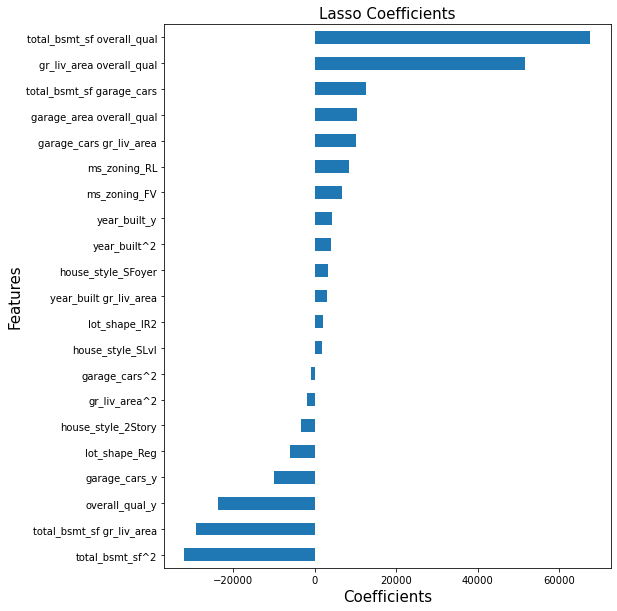

In [205]:
plt.figure(figsize=(8, 10))
lasso_coefs[lasso_coefs != 0].sort_values().plot.barh()
plt.title('Lasso Coefficients', size=15)
plt.xlabel('Coefficients', size=15)
plt.ylabel('Features', size=15);
plt.savefig('../visualizations/Lasso Coefficients.png', bbox_inches='tight')

# Do the above transformation and Lasso to Kaggle Data

In [147]:
kaggle_shortened_poly1 = kaggle_shortened_poly.drop(columns='id')

In [148]:
kaggle_shortened_poly1_scaled = ss.fit_transform(kaggle_shortened_poly1)

In [149]:
kaggle_shortened_poly1_scaled = pd.DataFrame(data=kaggle_shortened_poly1_scaled, index=kaggle_shortened_poly1.index, columns=kaggle_shortened_poly1.columns)

In [150]:
kaggle_shortened_poly1_scaled['id'] = kaggle_data['id']
cols = kaggle_shortened_poly1_scaled.columns.tolist()
cols = cols[-1:] + cols[:-1]
kaggle_shortened_poly1_scaled = kaggle_shortened_poly1_scaled[cols].copy() #  .copy() gets rid of the data error problem when making the saleprice column
kaggle_shortened_poly1_scaled.head()

,id,year_built,total_bsmt_sf,garage_cars,garage_area,gr_liv_area,overall_qual,year_built^2,year_built total_bsmt_sf,year_built garage_cars,year_built garage_area,year_built gr_liv_area,year_built overall_qual,total_bsmt_sf^2,total_bsmt_sf garage_cars,total_bsmt_sf garage_area,total_bsmt_sf gr_liv_area,total_bsmt_sf overall_qual,garage_cars^2,garage_cars garage_area,garage_cars gr_liv_area,garage_cars overall_qual,garage_area^2,garage_area gr_liv_area,garage_area overall_qual,gr_liv_area^2,gr_liv_area overall_qual,overall_qual^2
0,2658,-1.991272,-0.034747,-0.990177,-0.142805,0.851644,-0.036625,-1.977423,-0.114451,-1.021115,-0.210316,0.723836,-0.172711,-0.208575,-0.660367,-0.199889,0.304687,-0.116533,-0.991695,-0.713276,-0.458590,-0.798227,-0.316452,0.176401,-0.203732,0.658272,0.426755,-0.143350
1,2718,0.214229,2.257062,0.343221,0.515669,0.928691,-0.767467,0.207821,2.223068,0.337968,0.509919,0.928443,-0.732548,2.737881,1.429357,1.542315,2.042295,0.863933,0.152970,0.274069,0.600906,-0.182642,0.303899,0.726856,-0.060084,0.740221,0.076668,-0.780185
2,2414,1.168849,-0.920493,0.343221,-0.208652,-0.001807,0.694217,1.177033,-0.880884,0.376533,-0.177025,0.047856,0.745065,-0.846767,-0.453833,-0.628344,-0.597828,-0.523499,0.152970,-0.148295,0.103376,0.432943,-0.369121,-0.220671,-0.014780,-0.139700,0.205350,0.609272
3,1989,-1.563339,-0.160590,0.343221,0.045330,-1.044913,-0.767467,-1.559311,-0.218930,0.266158,-0.015970,-1.082420,-0.828520,-0.316255,-0.003474,-0.160013,-0.635603,-0.454352,0.152970,-0.000194,-0.454365,-0.182642,-0.156586,-0.545548,-0.336329,-0.841550,-0.932379,-0.780185
4,625,-0.246622,0.870361,0.343221,0.205245,-0.203316,-0.036625,-0.255023,0.835009,0.319351,0.186140,-0.214554,-0.059678,0.731848,0.607523,0.474064,0.283385,0.475705,0.152970,0.093056,-0.004370,0.125150,-0.009769,-0.071607,0.041574,-0.298726,-0.220491,-0.143350


In [151]:
kaggle_shortened_poly1_scaled.shape

(878, 28)

In [152]:
new_kaggle_data_scaled = pd.merge(kaggle_dummies, kaggle_shortened_poly1_scaled, on='id')

In [153]:
kaggle_new_X_scaled = new_kaggle_data_scaled[combined_features]
kaggle_new_X_scaled

,year_built_y,total_bsmt_sf_y,garage_cars_y,garage_area_y,gr_liv_area_y,overall_qual_y,year_built^2,year_built total_bsmt_sf,year_built garage_cars,year_built garage_area,year_built gr_liv_area,year_built overall_qual,total_bsmt_sf^2,total_bsmt_sf garage_cars,total_bsmt_sf garage_area,total_bsmt_sf gr_liv_area,total_bsmt_sf overall_qual,garage_cars^2,garage_cars garage_area,garage_cars gr_liv_area,garage_cars overall_qual,garage_area^2,garage_area gr_liv_area,garage_area overall_qual,gr_liv_area^2,gr_liv_area overall_qual,house_style_1.5Unf,house_style_1Story,house_style_2.5Fin,house_style_2.5Unf,house_style_2Story,house_style_SFoyer,house_style_SLvl,lot_shape_IR1,lot_shape_IR2,lot_shape_IR3,lot_shape_Reg,ms_zoning_C (all),ms_zoning_FV,ms_zoning_I (all),ms_zoning_RH,ms_zoning_RL,ms_zoning_RM
0,-1.991272,-0.034747,-0.990177,-0.142805,0.851644,-0.036625,-1.977423,-0.114451,-1.021115,-0.210316,0.723836,-0.172711,-0.208575,-0.660367,-0.199889,0.304687,-0.116533,-0.991695,-0.713276,-0.458590,-0.798227,-0.316452,0.176401,-0.203732,0.658272,0.426755,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
1,0.214229,2.257062,0.343221,0.515669,0.928691,-0.767467,0.207821,2.223068,0.337968,0.509919,0.928443,-0.732548,2.737881,1.429357,1.542315,2.042295,0.863933,0.152970,0.274069,0.600906,-0.182642,0.303899,0.726856,-0.060084,0.740221,0.076668,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
2,1.168849,-0.920493,0.343221,-0.208652,-0.001807,0.694217,1.177033,-0.880884,0.376533,-0.177025,0.047856,0.745065,-0.846767,-0.453833,-0.628344,-0.597828,-0.523499,0.152970,-0.148295,0.103376,0.432943,-0.369121,-0.220671,-0.014780,-0.139700,0.205350,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0
3,-1.563339,-0.160590,0.343221,0.045330,-1.044913,-0.767467,-1.559311,-0.218930,0.266158,-0.015970,-1.082420,-0.828520,-0.316255,-0.003474,-0.160013,-0.635603,-0.454352,0.152970,-0.000194,-0.454365,-0.182642,-0.156586,-0.545548,-0.336329,-0.841550,-0.932379,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
4,-0.246622,0.870361,0.343221,0.205245,-0.203316,-0.036625,-0.255023,0.835009,0.319351,0.186140,-0.214554,-0.059678,0.731848,0.607523,0.474064,0.283385,0.475705,0.152970,0.093056,-0.004370,0.125150,-0.009769,-0.071607,0.041574,-0.298726,-0.220491,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
873,0.115475,0.120138,0.343221,0.082957,0.750889,-0.036625,0.108363,0.116362,0.333979,0.078738,0.746369,-0.036218,-0.068313,0.162901,0.001988,0.366891,-0.015187,0.152970,0.021747,0.505836,0.125150,-0.122944,0.303705,-0.044614,0.553585,0.364939,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0
874,-0.147868,0.168540,0.343221,0.045330,0.970179,-0.036625,-0.156119,0.153279,0.323340,0.032569,0.947932,-0.053280,-0.022731,0.191586,0.004324,0.513098,0.016483,0.152970,-0.000194,0.623089,0.125150,-0.156586,0.375704,-0.071134,0.785027,0.499479,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0
875,-0.082032,-0.199311,-0.990177,-0.697804,-0.564847,-0.767467,-0.090099,-0.204389,-0.982550,-0.696424,-0.564865,-0.748543,-0.348254,-0.709132,-0.558007,-0.438466,-0.475465,-0.991695,-0.875091,-0.837284,-0.952123,-0.707065,-0.686103,-0.772796,-0.555901,-0.686935,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
876,0.016721,-0.412278,0.343221,0.271093,-1.250373,-1.498309,0.009056,-0.409877,0.329990,0.260703,-1.239655,-1.443807,-0.514716,-0.152637,-0.181281,-0.809615,-0.819618,0.152970,0.131452,-0.564223,-0.490435,0.053604,-0.561444,-0.495446,-0.944335,-1.211963,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [199]:
kaggle_predictions_scaled = lasso.predict(kaggle_new_X_scaled[combined_features])

In [200]:
kaggle_predictions_scaled

array([163291.69156362, 144190.92902363, 189128.54228086, 114917.50974686,
       179969.31436679, 110725.94538184, 112113.13857842, 145613.25014047,
       209013.72019899, 170681.36803135, 172329.86595154, 128696.93583272,
       168558.82615074, 309113.72546769, 169554.7020586 , 110157.65350747,
       165936.95174224, 132571.45632229, 185699.10012023, 189259.89525941,
       139554.47098457, 140165.23965939, 187607.189077  , 158359.60848297,
       200341.3200029 , 134250.63107574, 138093.83526906, 121582.45081403,
       153376.0545607 ,  97987.88893127, 132235.21601785, 111393.96763595,
       267304.70662698, 145098.9651544 , 218527.6636123 , 184753.36929644,
       105249.06110584,  87163.22172338,  86232.4755974 , 214951.37207944,
       155000.50084529, 225075.00160771, 152100.66018001, 139603.72335548,
       217493.38242325, 114329.12686333, 226508.22129433, 119606.20391136,
       126274.59728873, 132451.7493858 , 117881.89347393, 204797.2933028 ,
       283373.46159055, 1

In [201]:
kaggle_new_X_scaled['saleprice'] = kaggle_predictions_scaled

<ipython-input-201-ad2d2dec4196>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaggle_new_X_scaled['saleprice'] = kaggle_predictions_scaled


In [202]:
kaggle_new_X_scaled

,year_built_y,total_bsmt_sf_y,garage_cars_y,garage_area_y,gr_liv_area_y,overall_qual_y,year_built^2,year_built total_bsmt_sf,year_built garage_cars,year_built garage_area,year_built gr_liv_area,year_built overall_qual,total_bsmt_sf^2,total_bsmt_sf garage_cars,total_bsmt_sf garage_area,total_bsmt_sf gr_liv_area,total_bsmt_sf overall_qual,garage_cars^2,garage_cars garage_area,garage_cars gr_liv_area,garage_cars overall_qual,garage_area^2,garage_area gr_liv_area,garage_area overall_qual,gr_liv_area^2,gr_liv_area overall_qual,house_style_1.5Unf,house_style_1Story,house_style_2.5Fin,house_style_2.5Unf,house_style_2Story,house_style_SFoyer,house_style_SLvl,lot_shape_IR1,lot_shape_IR2,lot_shape_IR3,lot_shape_Reg,ms_zoning_C (all),ms_zoning_FV,ms_zoning_I (all),ms_zoning_RH,ms_zoning_RL,ms_zoning_RM,saleprice,id
0,-1.991272,-0.034747,-0.990177,-0.142805,0.851644,-0.036625,-1.977423,-0.114451,-1.021115,-0.210316,0.723836,-0.172711,-0.208575,-0.660367,-0.199889,0.304687,-0.116533,-0.991695,-0.713276,-0.458590,-0.798227,-0.316452,0.176401,-0.203732,0.658272,0.426755,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,163291.691564,2658
1,0.214229,2.257062,0.343221,0.515669,0.928691,-0.767467,0.207821,2.223068,0.337968,0.509919,0.928443,-0.732548,2.737881,1.429357,1.542315,2.042295,0.863933,0.152970,0.274069,0.600906,-0.182642,0.303899,0.726856,-0.060084,0.740221,0.076668,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,144190.929024,2718
2,1.168849,-0.920493,0.343221,-0.208652,-0.001807,0.694217,1.177033,-0.880884,0.376533,-0.177025,0.047856,0.745065,-0.846767,-0.453833,-0.628344,-0.597828,-0.523499,0.152970,-0.148295,0.103376,0.432943,-0.369121,-0.220671,-0.014780,-0.139700,0.205350,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,189128.542281,2414
3,-1.563339,-0.160590,0.343221,0.045330,-1.044913,-0.767467,-1.559311,-0.218930,0.266158,-0.015970,-1.082420,-0.828520,-0.316255,-0.003474,-0.160013,-0.635603,-0.454352,0.152970,-0.000194,-0.454365,-0.182642,-0.156586,-0.545548,-0.336329,-0.841550,-0.932379,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,114917.509747,1989
4,-0.246622,0.870361,0.343221,0.205245,-0.203316,-0.036625,-0.255023,0.835009,0.319351,0.186140,-0.214554,-0.059678,0.731848,0.607523,0.474064,0.283385,0.475705,0.152970,0.093056,-0.004370,0.125150,-0.009769,-0.071607,0.041574,-0.298726,-0.220491,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,179969.314367,625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
873,0.115475,0.120138,0.343221,0.082957,0.750889,-0.036625,0.108363,0.116362,0.333979,0.078738,0.746369,-0.036218,-0.068313,0.162901,0.001988,0.366891,-0.015187,0.152970,0.021747,0.505836,0.125150,-0.122944,0.303705,-0.044614,0.553585,0.364939,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,193650.543730,1662
874,-0.147868,0.168540,0.343221,0.045330,0.970179,-0.036625,-0.156119,0.153279,0.323340,0.032569,0.947932,-0.053280,-0.022731,0.191586,0.004324,0.513098,0.016483,0.152970,-0.000194,0.623089,0.125150,-0.156586,0.375704,-0.071134,0.785027,0.499479,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,196344.699786,1234
875,-0.082032,-0.199311,-0.990177,-0.697804,-0.564847,-0.767467,-0.090099,-0.204389,-0.982550,-0.696424,-0.564865,-0.748543,-0.348254,-0.709132,-0.558007,-0.438466,-0.475465,-0.991695,-0.875091,-0.837284,-0.952123,-0.707065,-0.686103,-0.772796,-0.555901,-0.686935,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,139948.527681,1373
876,0.016721,-0.412278,0.343221,0.271093,-1.250373,-1.498309,0.009056,-0.409877,0.329990,0.260703,-1.239655,-1.443807,-0.514716,-0.152637,-0.181281,-0.809615,-0.819618,0.152970,0.131452,-0.564223,-0.490435,0.053604,-0.561444,-0.495446,-0.944335,-1.211963,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,120690.880869,1672


In [203]:
kaggle_new_X_scaled['id'] = kaggle_data['id']

<ipython-input-203-4602f38ba3c1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaggle_new_X_scaled['id'] = kaggle_data['id']


In [204]:
final_kaggle_df_scaled = kaggle_new_X_scaled[['id', 'saleprice']]
final_kaggle_df_scaled

,id,saleprice
0,2658,163291.691564
1,2718,144190.929024
2,2414,189128.542281
3,1989,114917.509747
4,625,179969.314367
...,...,...
873,1662,193650.543730
874,1234,196344.699786
875,1373,139948.527681
876,1672,120690.880869


In [160]:
final_kaggle_df_scaled.to_csv('../datasets/Kaggle_mlr1_poly_and_locations_scaled_lasso.csv', index=False)

# Igore, testing alhpa below

In [171]:
#kaggle_lasso_y = kaggle_new_X_scaled['saleprice']

In [172]:
#kaggle_lasso_X = kaggle_new_X_scaled[combined_features]

In [173]:
#kaggle_y = kaggle_new_X_scaled['saleprice']

In [176]:
# l_alhpas1 = np.logspace(-3, 200, 300)
# lasso1 = LassoCV(alphas=l_alhpas1, cv=5)
# lasso1.fit(kaggle_lasso_X, kaggle_y)

LassoCV(alphas=array([1.00000000e-003, 4.77452054e-003, 2.27960464e-002, 1.08840192e-001,
       5.19659730e-001, 2.48112606e+000, 1.18461873e+001, 5.65598646e+001,
       2.70046235e+002, 1.28934130e+003, 6.15598650e+003, 2.93918840e+004,
       1.40332154e+005, 6.70018750e+005, 3.19901828e+006, 1.52737785e+007,
       7.29249692e+007, 3.48181763e+008, 1.66240098e+009, 7.93716762e+009,
       3.789616...
       2.42446202e+184, 1.15756437e+185, 5.52681486e+185, 2.63878910e+186,
       1.25989528e+187, 6.01539588e+187, 2.87206312e+188, 1.37127243e+189,
       6.54716840e+189, 3.12595900e+190, 1.49249555e+191, 7.12595063e+191,
       3.40229977e+192, 1.62443501e+193, 7.75589832e+193, 3.70306958e+194,
       1.76803818e+195, 8.44153460e+195, 4.03042803e+196, 1.92433614e+197,
       9.18778243e+197, 4.38672559e+198, 2.09445114e+199, 1.00000000e+200]),
        cv=5)

In [177]:
#lasso1.alpha_

0.001

In [178]:
#lasso1.score(kaggle_lasso_X, kaggle_y)

0.9999903249239483

In [179]:
#lasso1.coef_

array([-6.71266827e+03, -5.98860564e+03, -9.66070805e+03,  2.33303934e+02,
       -1.55180530e+03, -1.30809611e+04,  1.52804252e+04,  6.23244123e+03,
       -1.46922047e+03,  1.27565519e+02,  4.96873735e+03, -1.23426647e+04,
       -3.17385352e+04,  1.27070096e+04,  9.64050898e-01, -2.93254949e+04,
        6.73515908e+04, -2.52988562e+03,  2.01384984e+01,  1.07088225e+04,
        3.21066170e+03,  7.88373017e+02, -7.39732773e+01,  8.71927986e+03,
       -3.20572744e+03,  5.29137021e+04, -2.41627650e+01,  7.12188517e+00,
       -4.92124564e+01,  9.53790361e+01, -3.32931817e+03,  4.29152521e+03,
        2.25360577e+03,  5.81028151e+03,  8.38245940e+03,  5.83869809e+03,
       -3.63193356e+02, -2.47649149e+03,  5.35327746e+03, -2.53584889e+03,
       -2.26810648e+03,  6.36034486e+03, -2.31220737e+03])

In [180]:
#lasso1_coefs = pd.Series(lasso1.coef_, index=kaggle_lasso_X.columns)

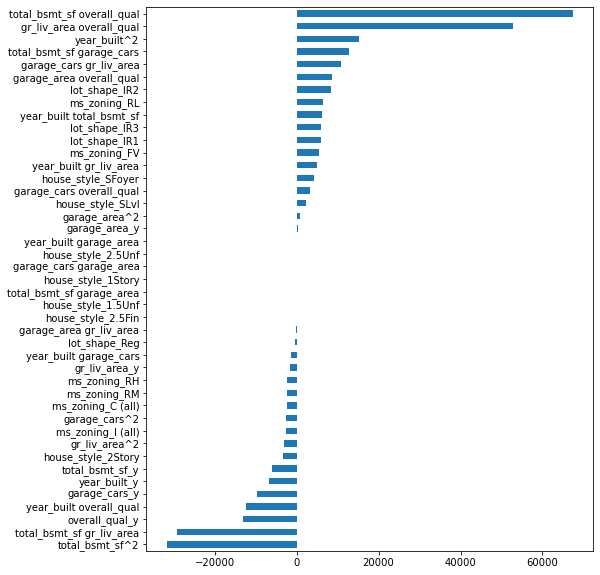

In [181]:
# plt.figure(figsize=(8, 10))
# lasso1_coefs[lasso1_coefs != 0].sort_values().plot.barh();